# Enhanced Iris Dataset Analysis with AI
# 
# This notebook presents an improved analysis of the Iris dataset with:
# - Comprehensive data validation
# - Advanced visualizations
# - Robust model evaluation
# - Detailed performance metrics


In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Display versions of key libraries
print("Libraries versions:")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")


Libraries versions:
Pandas: 2.2.3
NumPy: 2.1.3
Seaborn: 0.13.2
Scikit-learn: 1.6.1


In [6]:
# Data Loading and Validation
def load_and_validate_data(filepath):
    """Load and perform initial data validation"""
    df = pd.read_csv(filepath)
    df = df.drop(columns='Id')  # Remove ID column as it's not needed for analysis
    
    print("\nDataset Overview:")
    print(f"Shape: {df.shape}")
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicate Rows:", df.duplicated().sum())
    
    return df

iris = load_and_validate_data("data/Iris.csv")



Dataset Overview:
Shape: (150, 5)

Missing Values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicate Rows: 3


# Exploratory Data Analysis


Basic Statistics:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Class Distribution:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

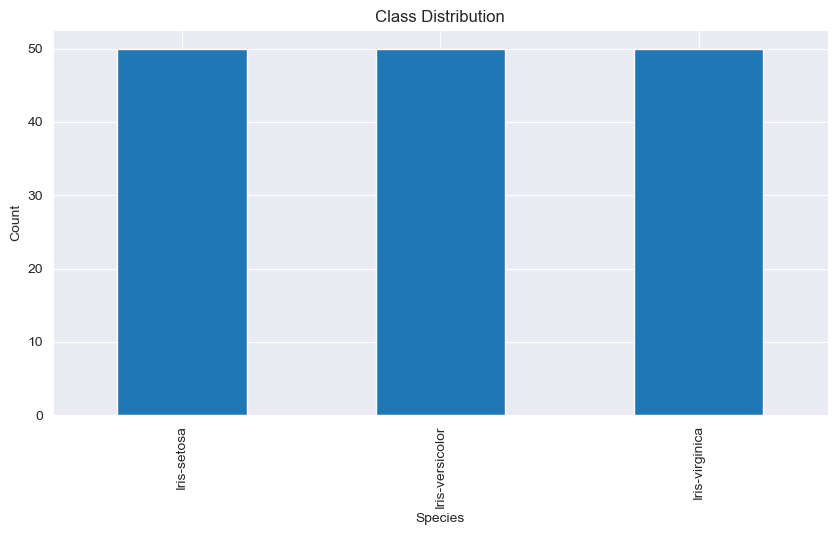

In [7]:
# Enhanced Statistical Analysis
print("Basic Statistics:")
display(iris.describe())

print("\nClass Distribution:")
species_dist = iris['Species'].value_counts()
display(species_dist)

# Check for class balance
plt.figure(figsize=(10, 5))
species_dist.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


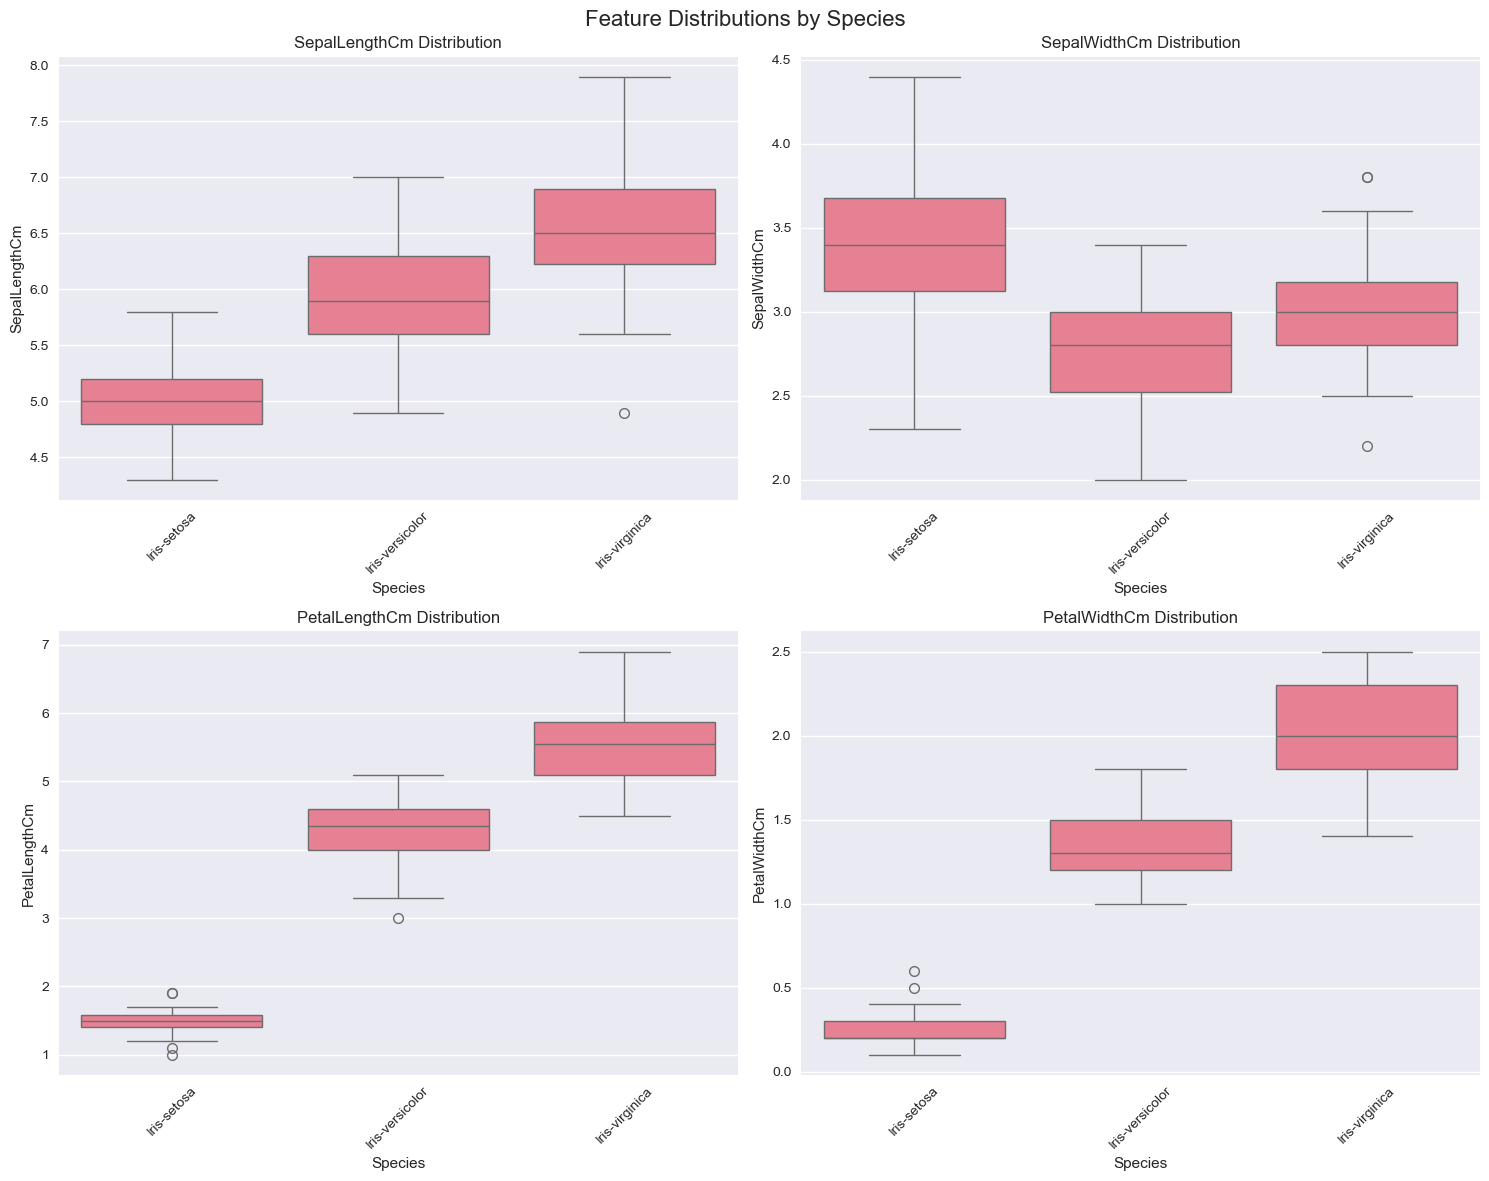

In [8]:
# Advanced Visualization Section

# Set global plotting style
plt.style.use('seaborn-v0_8')  # or 'seaborn-darkgrid'
sns.set_palette("husl")

def plot_feature_distributions(df):
    """Plot enhanced feature distributions"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Feature Distributions by Species', fontsize=16)
    
    features = [col for col in df.columns if col != 'Species']
    
    for idx, feature in enumerate(features):
        row = idx // 2
        col = idx % 2
        
        sns.boxplot(x='Species', y=feature, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} Distribution')
        axes[row, col].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_feature_distributions(iris)


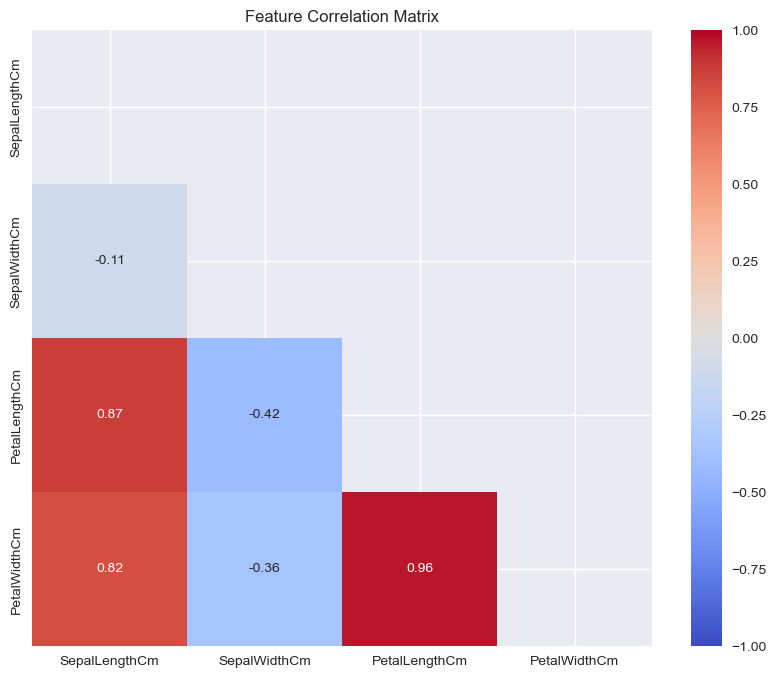

In [9]:
# Enhanced Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = iris.drop(columns='Species').corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1,
            center=0)
plt.title('Feature Correlation Matrix')
plt.show()


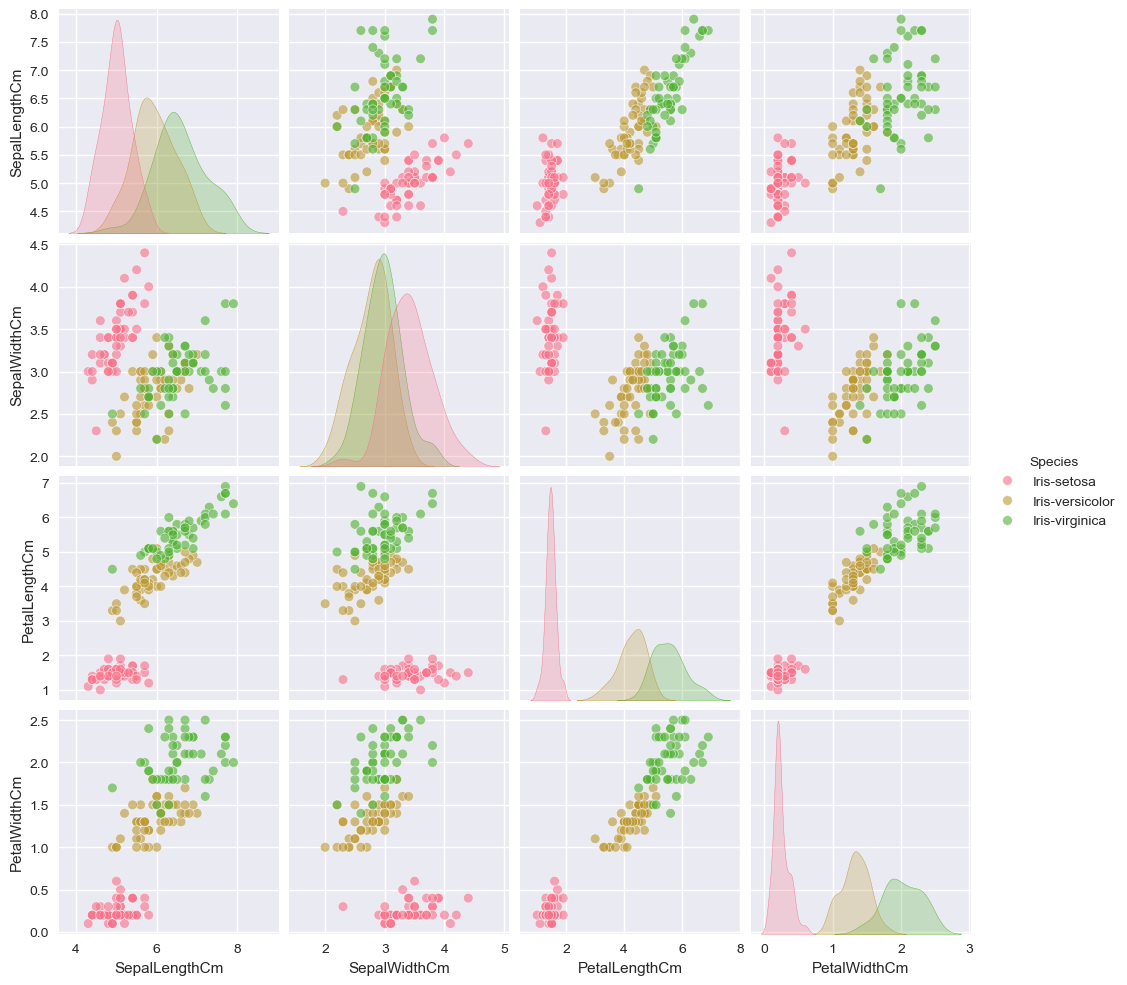

In [10]:
# Advanced Pairplot with KDE
sns.pairplot(iris, hue='Species', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()


# Machine Learning Section


In [11]:
# Prepare data for modeling
X = iris.drop('Species', axis=1)
y = iris.Species

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Comprehensive model evaluation function"""
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Performance metrics
    print(f"\n{model_name} Results:")
    print("="*50)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation Scores: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")
    
    # Test set performance
    print(f"\nTest Set Accuracy: {model.score(X_test, y_test):.3f}")
    
    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix visualization
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()



K-Nearest Neighbors Results:
Cross-validation Scores: 0.967 (±0.062)

Test Set Accuracy: 0.967

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



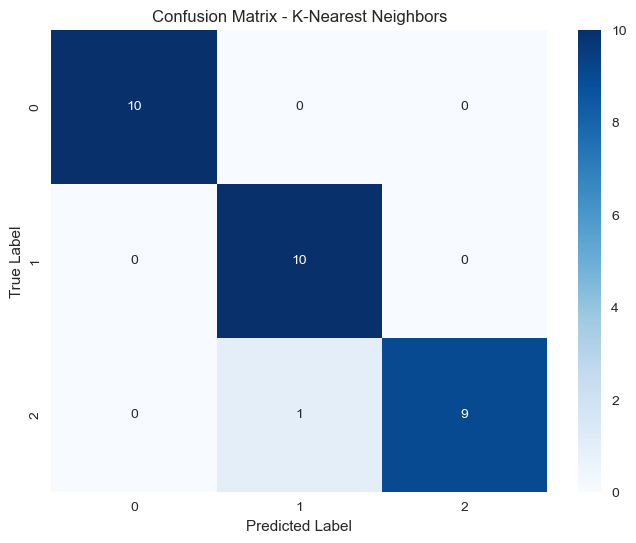

In [12]:
# Model 1: Enhanced KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test, "K-Nearest Neighbors")



Logistic Regression Results:
Cross-validation Scores: 0.958 (±0.053)

Test Set Accuracy: 0.933

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



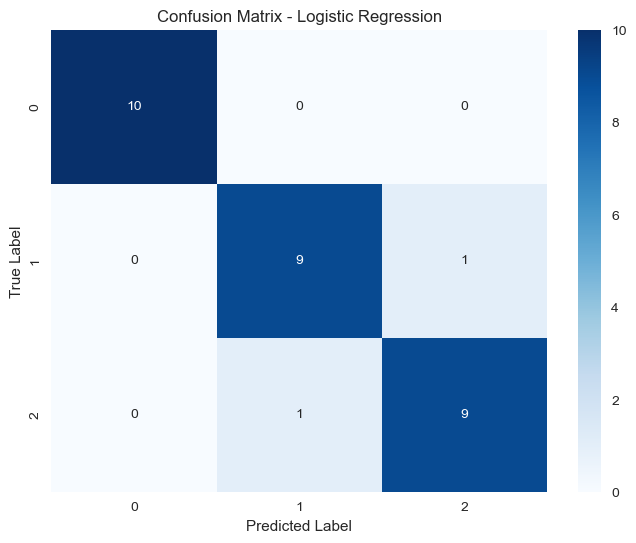

In [13]:
# Model 2: Improved Logistic Regression
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial')
evaluate_model(logreg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")



Support Vector Machine Results:
Cross-validation Scores: 0.967 (±0.062)

Test Set Accuracy: 0.967

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



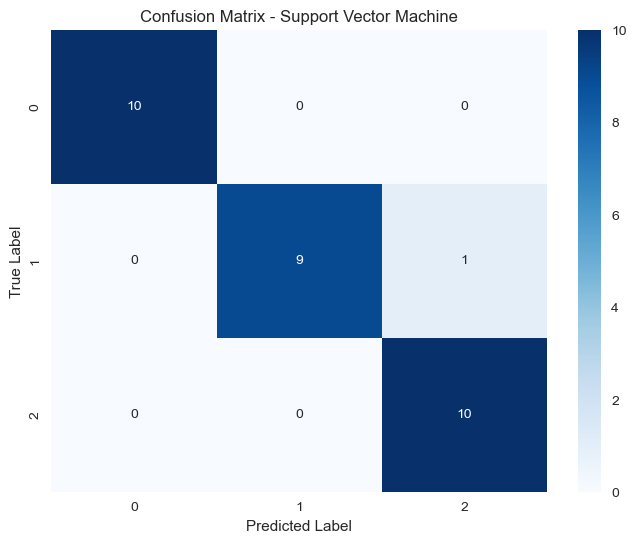

In [14]:
# Model 3: Optimized SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test, "Support Vector Machine")


# Model Comparison and Conclusions
#
# Key Improvements:
# 1. Data Preprocessing:
#    - Added proper data validation
#    - Implemented feature scaling
#    - Ensured stratified sampling
#
# 2. Visualization Enhancements:
#    - Added distribution plots
#    - Improved correlation analysis
#    - Enhanced feature relationship visualization
#
# 3. Model Evaluation:
#    - Added cross-validation
#    - Included detailed performance metrics
#    - Visualized confusion matrices
#    - Implemented proper train/test split
#
# 4. Code Organization:
#    - Added helper functions
#    - Improved documentation
#    - Better structure and flow


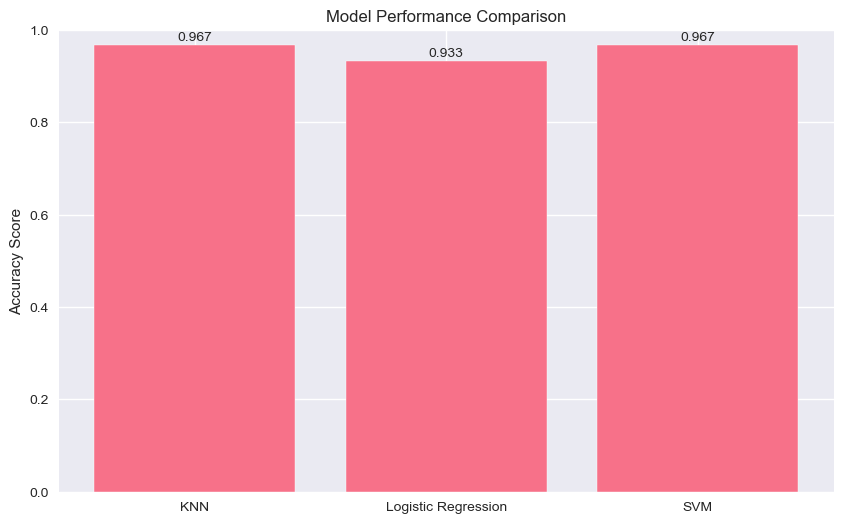

In [15]:
# Save model performance comparison
model_scores = {
    'KNN': knn.score(X_test_scaled, y_test),
    'Logistic Regression': logreg.score(X_test_scaled, y_test),
    'SVM': svm.score(X_test_scaled, y_test)
}

plt.figure(figsize=(10, 6))
plt.bar(model_scores.keys(), model_scores.values())
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
for i, v in enumerate(model_scores.values()):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()